# 10 - Polynomial Regression

### The following topics are discussed in this notebook:
* Linear Regression using scikit-learn.
* Simple Linear Regression
* Multiple Linear Regression

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Machine Learning, Ch 3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Polynomial Linear Regresion

Although it might seem counter-intuitive, we can use linear regression to create models in when the relationship between the features (predictors) and the label (response) are non-linear. We will illustrate this example in the situation where we have a single feature. 

Consider the following scenario:

* We have a single feature, $x$. The observed values of $x$ are denoted $x_1, x_2, ..., x_n$.
* The observed values of the label are denoted $y_1, y_2, ..., y_n$.
* We wish to use linear regression to find a model of the form: $\large \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \hat{\beta}_3 x^3 + ... + \hat{\beta}_p x^p$.
* We can use multiple regression to create such a model. To do so, we define new features $x^{(1)}, x^{(2)}, ..., x^{(p)}$ as follows: $x^{(1)} = x, x^{(2)} = x^2, ..., x^{(p)} = x^p$.
* This results in the following feature matrix:
$X = \begin{array}{c}
\begin{matrix}
x^{(1)} & x^{(2)} & \cdots & x^{(p)}
\end{matrix} \\
\left[\ \begin{matrix}
x_1 & x_1^2 & \cdots & x_1^p \\
x_2 & x_2^2 & \cdots & x_2^p \\
x_3 & x_3^2 & \cdots & x_3^p \\
\vdots & \vdots & & \vdots \\
x_n & x_n^2 & \cdots & x_n^p
\end{matrix}\ \right]
\end{array}$

Let's consider an example.

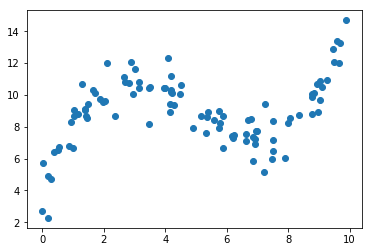

In [2]:
np.random.seed(1)
x = np.random.uniform(0,10,100)
y = 0.1*x**3 - 1.5*x**2 + 6.2*x + 3 + np.random.normal(0,1,100)

plt.close()
plt.scatter(x,y)
plt.show()

## Linear Model

We will start by using Scikit-Learn to produce a linear model.

In [3]:
X = x.reshape(len(x),1) # all scikit learn requires this to be two-D array

linearMod = LinearRegression() # this class is from scikit learn
linearMod.fit(X,y)

print("Intercept: ", linearMod.intercept_)
print("Coefficeint: ", linearMod.coef_)
print("Training r^2: ", linearMod.score(X,y))

Intercept:  7.96217004772
Coefficeint:  [ 0.20144939]
Training r^2:  0.0776210647856


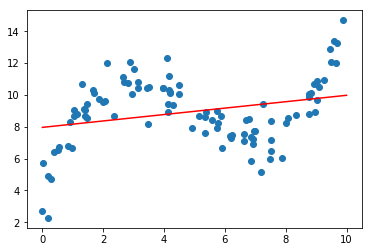

In [4]:
xticks = np.linspace(0,10,100).reshape(100,1)
yPredict = linearMod.predict(xticks)

plt.close()
plt.scatter(x,y) # x is a 1 d numpy array this could be large X
plt.plot(xticks,yPredict, c="r")
plt.show()

## Cubic Model

We will now use Scikit-Learn to create a model with the form of a cubic polynomial. 

In [5]:
x1 = x.reshape(len(x),1) # x1 is 2 D
x2 = x1 **2
x3 = x1 **3

XCubic = np.concatenate((x1,x2,x3), axis=1)  #(x1,x2,x3) is tuble
print(XCubic[:10,:])

[[  4.17022005e+00   1.73907352e+01   7.25231927e+01]
 [  7.20324493e+00   5.18867376e+01   3.73752880e+02]
 [  1.14374817e-03   1.30815988e-06   1.49620548e-09]
 [  3.02332573e+00   9.14049845e+00   2.76347041e+01]
 [  1.46755891e+00   2.15372915e+00   3.16072440e+00]
 [  9.23385948e-01   8.52641608e-01   7.87317280e-01]
 [  1.86260211e+00   3.46928663e+00   6.46190062e+00]
 [  3.45560727e+00   1.19412216e+01   4.12641722e+01]
 [  3.96767474e+00   1.57424429e+01   6.24608929e+01]
 [  5.38816734e+00   2.90323473e+01   1.56431145e+02]]


In [6]:
cubicMod = LinearRegression() # this class is from scikit learn
cubicMod.fit(XCubic,y)

print("Intercept: ", cubicMod.intercept_)
print("Coefficeint: ", cubicMod.coef_)
print("Training r^2: ", cubicMod.score(XCubic,y))

Intercept:  3.55967198746
Coefficeint:  [ 5.87644424 -1.44447017  0.09711768]
Training r^2:  0.826262377529


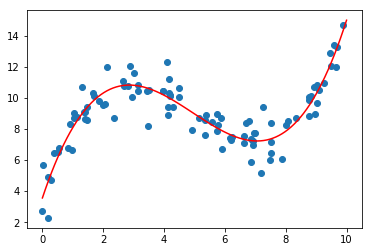

In [7]:
xticks = np.linspace(0,10,100).reshape(100,1)
XNew = np.concatenate((xticks,xticks**2,xticks**3),axis=1)

yPredict = cubicMod.predict(XNew) # predict takes 3 arguments

plt.close()
plt.scatter(x,y) # x is a 1 d numpy array this could be large X
plt.plot(xticks,yPredict, c="r")
plt.show()

## Overfitting 

We need to be careful when using models with a polynomial form. Such models are more flexible than models with linear forms. As a result, higher degree models will ALWAYS result in a lower training SSE (and thus higher r-squared value) than those with lower degrees. However, because of their flexibility, they have a higher risk of overfitting the training data. This risk is greater with working with a small number of observations. 

This is illustrated in the following example. 

In [14]:
%matplotlib inline
%run -i examples/example07.py

A Jupyter Widget